# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Hilman Singgih Wicaksana
- Email: singgih.hilman@gmail.com
- Id Dicoding: hilmansinggihw

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam 3 tahun terakhir?
- Produk apa yang paling banyak dan paling sedikit diminati?
- Bagaimana demografi pelanggan yang kita miliki?
- Bagaimana demografi penjual yang kita miliki?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat data customers_dataset
customers_dataset = pd.read_csv("D:\Dicoding Submission\e-commerce-streamlit\data\customers_dataset.csv")
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Memuat data products_dataset
products_dataset = pd.read_csv("D:\Dicoding Submission\e-commerce-streamlit\data\products_dataset.csv")
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
# Memuat data sellers_dataset
sellers_dataset = pd.read_csv("D:\Dicoding Submission\e-commerce-streamlit\data\sellers_dataset.csv")
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
# Memuat data order_payments_dataset
order_payments_dataset = pd.read_csv("D:\Dicoding Submission\e-commerce-streamlit\data\order_payments_dataset.csv")
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Memuat data order_items_dataset
order_items_dataset = pd.read_csv("D:\Dicoding Submission\e-commerce-streamlit\data\order_items_dataset.csv")
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Memuat data orders_dataset
orders_dataset = pd.read_csv("D:\Dicoding Submission\e-commerce-streamlit\data\orders_dataset.csv")
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

#### Menilai Data customers_dataset

In [8]:
# Memeriksa tipe data dari setiap kolom dalam data customers_dataset
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
# Memeriksa duplikasi dan ringkasan parameter statistik dari data customers_dataset
print("Jumlah data yang terduplikasi :", customers_dataset.duplicated().sum())

customers_dataset.describe()

Jumlah data yang terduplikasi : 0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Data products_dataset

In [10]:
# Memeriksa tipe data dari setiap kolom dalam data products_dataset
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
# Menunjukkan adanya missing value pada kolom product_category_name, product_name_length, product_description_length,
# product_photos_qty, product_weight_g, product_length_cm, product_hieght_cm, dan product_width_cm
products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [12]:
# Memeriksa duplikasi dan ringkasan parameter statistik dari data products_dataset
print("Jumlah data yang terduplikasi :", products_dataset.duplicated().sum())

products_dataset.describe()

Jumlah data yang terduplikasi : 0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai Data sellers_dataset

In [13]:
# Memeriksa tipe data dari setiap kolom dalam data sellers_dataset
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [14]:
# Memeriksa duplikasi dan ringkasan parameter statistik dari data products_dataset
print("Jumlah data yang terduplikasi :", sellers_dataset.duplicated().sum())

sellers_dataset.describe()

Jumlah data yang terduplikasi : 0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### Menilai Data order_items_dataset

In [15]:
# Memeriksa tipe data dari setiap kolom dalam data order_items_dataset
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
# Memeriksa duplikasi dan ringkasan parameter statistik dari data order_items_dataset
print("Jumlah data yang terduplikasi :", order_items_dataset.duplicated().sum())

order_items_dataset.describe()

Jumlah data yang terduplikasi : 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai Data order_payments_dataset

In [17]:
# Memeriksa tipe data dari setiap kolom dalam data order_payments_dataset
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
# Memeriksa duplikasi dan ringkasan parameter statistik dari data order_payments_dataset
print("Jumlah data yang terduplikasi :", order_payments_dataset.duplicated().sum())

order_payments_dataset.describe()

Jumlah data yang terduplikasi : 0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai Data orders_dataset

In [19]:
# Memeriksa tipe data dari setiap kolom dalam data orders_dataset
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
# Menunjukkan adanya missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
# Memeriksa duplikasi dan ringkasan parameter statistik dari data orders_dataset
print("Jumlah data yang terduplikasi :", orders_dataset.duplicated().sum())

orders_dataset.describe()

Jumlah data yang terduplikasi : 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Cleaning Data

#### Membersihkan Data customers_dataset

In [22]:
# Data pada customers_dataset sudah bersih

#### Membersihkan Data products_dataset

In [23]:
# Melihat baris data pada kolom product_category_name yang mengandung missing value
products_dataset[products_dataset.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [24]:
# Menghapus baris yang mengandung missing value pada kolom product_category_name
products_dataset.dropna(axis=0, subset=['product_category_name'], inplace=True)

In [25]:
products_dataset.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [26]:
# Melihat baris data yang mengandung missing value pada kolom product_weight_g
products_dataset[products_dataset.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [27]:
# Mengisi missing value pada product_weight_g, product_length_cm, product_height_cm, dan product_width_cm dengan nilai mean
products_dataset.product_weight_g.fillna(value=products_dataset.product_weight_g.mean(), inplace=True)
products_dataset.product_length_cm.fillna(value=products_dataset.product_length_cm.mean(), inplace=True)
products_dataset.product_height_cm.fillna(value=products_dataset.product_height_cm.mean(), inplace=True)
products_dataset.product_width_cm.fillna(value=products_dataset.product_width_cm.mean(), inplace=True)

In [28]:
products_dataset.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Membersihkan Data pada sellers_dataset

In [29]:
# Data pada sellers_dataset sudah bersih

#### Membersihkan Data pada order_items_dataset

In [30]:
# Mengganti tipe data pada kolom shipping_limit_dataset menjadi datetime
datetime_column = ["shipping_limit_date"]

for column in datetime_column:
    order_items_dataset[column] = pd.to_datetime(order_items_dataset[column])

In [31]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [32]:
# Menampilkan baris data yang memiliki nilai price minimum
order_items_dataset[order_items_dataset.price == order_items_dataset.price.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30


In [33]:
# Melihat value price minimum di atas 0.85
order_items_dataset.sort_values("price")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
...,...,...,...,...,...,...,...
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21


In [34]:
# Mengganti value price 0.85 menjadi 1.20
order_items_dataset.replace({'price': 0.85}, 1.20, inplace=True)

In [35]:
order_items_dataset.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653748,19.990320
min,1.000000,2016-09-19 00:15:34,1.200000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633922,15.806405


#### Membersihkan Data pada order_payments_dataset

In [36]:
# Data pada order_payments_dataset sudah bersih

#### Membersihkan Data pada orders_dataset

In [37]:
'''Mengganti tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date,
order_delivered_customer_date, dan order_estimated_delivery_date menjadi datetime'''
datetime_column = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
"order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_column:
    orders_dataset[column] = pd.to_datetime(orders_dataset[column])

In [38]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [39]:
# Melihat baris data yang mengandung missing value pada kolom order_approved_at
orders_dataset[orders_dataset.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [40]:
# Mengisi data yang mengandung missing value pada kolom order_approved_at
orders_dataset.order_approved_at.fillna(value=0, inplace=True)

In [41]:
# Mengisi data yang mengandung missing value pada kolom order_delivered_carrier_date
orders_dataset.order_delivered_carrier_date.fillna(value=0, inplace=True)

In [42]:
# Mengisi data yang mengandung missing value yaitu pada order_delivered_customer_date
orders_dataset.order_delivered_customer_date.fillna(value=0, inplace=True)

In [43]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  object        
 6   order_delivered_customer_date  99441 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [44]:
'''Mengganti tipe data pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date 
menjadi datetime'''
datetime_column = ["order_approved_at", "order_delivered_carrier_date","order_delivered_customer_date"]

for column in datetime_column:
    orders_dataset[column] = pd.to_datetime(orders_dataset[column])

In [45]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Eksplorasi Data customers_dataset

In [46]:
# Melihat rangkuman parameter statistik customers_dataset
customers_dataset.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [47]:
# Melihat demografi pelanggan berdasarkan kota (city)
customers_dataset.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [48]:
# Melihat demografi pelanggan berdasarkan negara bagian (state)
customers_dataset.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Eksplorasi Data products_dataset

In [49]:
# Melihat rangkuman parameter statistik products_dataset
products_dataset.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341,32341,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000
unique,32341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245741,635.115225,1.736766,4279.225683,16.955703,13.635904,12.078575
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [50]:
# Melihat jumlah produk berdasarkan pada nama kategori produk
products_dataset.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

### Eksplorasi Data sellers_dataset

In [51]:
# Melihat rangkuman parameter statistik sellers_dataset
sellers_dataset.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [52]:
# Melihat demografi penjual berdasarkan kota
sellers_dataset.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [53]:
# Melihat demografi penjual berdasarkan negara
sellers_dataset.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Eksplorasi Data order_items_dataset

In [54]:
# Membuat rangkuman parameter statistik data order_items_dataset
order_items_dataset.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653748,19.990320
min,1.000000,2016-09-19 00:15:34,1.200000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633922,15.806405


In [55]:
# Menunjukkan jumlah order item berdasarkan harganya
order_items_dataset.groupby(by="price").order_item_id.nunique().sort_values(ascending=False)

price
1.20       20
98.70      20
100.00     20
51.00      15
65.49      15
           ..
29.35       1
131.10      1
131.17      1
29.33       1
6735.00     1
Name: order_item_id, Length: 5967, dtype: int64

In [56]:
# Menunjukkan jumlah order item berdarkan biaya transportasi
order_items_dataset.groupby(by="freight_value").order_item_id.nunique().sort_values(ascending=False)

freight_value
10.12     20
14.44     20
7.89      20
16.22     15
1.20      15
          ..
42.79      1
42.81      1
42.82      1
42.83      1
409.68     1
Name: order_item_id, Length: 6999, dtype: int64

### Eksplorasi Data order_payments_dataset

In [57]:
# Membuat rangkuman parameter statistik pada order_payments_dataset
order_payments_dataset.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [58]:
# Melihat pembayaran order berdasarkan nilai pembayarannya
order_payments_dataset.groupby(by="payment_value").order_id.nunique().sort_values(ascending=False)

payment_value
50.00       293
77.57       250
100.00      249
35.00       165
73.34       160
           ... 
222.07        1
222.09        1
222.11        1
222.15        1
13664.08      1
Name: order_id, Length: 29077, dtype: int64

### Eksplorasi Data orders_dataset

In [59]:
# Membuat rangkuman parameter statistik pada orders_dataset
orders_dataset.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-03 13:35:07.539676672,2017-02-24 11:40:50.281151744,2016-08-09 08:35:14.129111552,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 09:45:41,2017-09-07 00:22:29,2017-09-11 18:11:36,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 01:39:19,2018-01-19 21:29:35,2018-01-27 14:47:23,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [60]:
# Melihat jumlah order berdasarkan status order
orders_dataset.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Eksplorasi Data customers_dataset dan orders_dataset

In [61]:
# Melihat informasi customer_id pelanggan yang pernah melakukan order
customer_id_in_orders_dataset = orders_dataset.customer_id.tolist()
customers_dataset["status"] = customers_dataset["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_dataset else "Non Active")
customers_dataset.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
81833,d99ac336d73ac792b2501d0c9bb4db20,490181818ec661c6afd91ca1ff0ee049,89046,blumenau,SC,Active
94101,59fa4d3923b20aed0ae89cc86febe83d,6a612d163c494321a5a32bca5f558296,1325,sao paulo,SP,Active
74243,159ad0f6cbd047fb360f05bb09e6cfe4,fad2e77bba064ef0e420aae76fb3eea1,19600,rancharia,SP,Active
60645,69dba14ea6bbc43bc3f7aad54da1c19a,2e90f8efdffcf5551e991c349cb32ef0,78645,vila rica,MT,Active
67600,3615bada99d458b1fb522c5436065843,b98eecd39d6fda501e8f169721085a26,22020,rio de janeiro,RJ,Active
26170,351b7691a1c095b564f88fd4bf66e81b,4566e273dc806cb1b72c0994b9c44ed1,21330,rio de janeiro,RJ,Active
67875,9084b0a94916b534ac6e626011092567,0e850ed5adc4abe0346435eda5b1a626,24220,niteroi,RJ,Active
5363,119462e9d287bc17dfb152ee17ecdc54,88a466083129d095c6ff70d6336ad56a,89253,jaragua do sul,SC,Active
30537,d61fdb0c42d843ba72a06f8b597bcf6c,84ab84c176061542731d809158c20bbf,20220,rio de janeiro,RJ,Active
95207,aebec5696d5f14f312676983f3965b20,27cbfa02d06fde5a0e612721ec5bd891,14400,franca,SP,Active


In [62]:
# Melihat status pelanggan yang pernah order
customers_dataset.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

In [63]:
# Menggabungkan data orders_dataset dan customers_dataset
orders_customers_dataset = pd.merge(
    left=orders_dataset,
    right=customers_dataset,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [64]:
# 10 jumlah order tertinggi berdasarkan kota
orders_customers_dataset.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [65]:
# 10 jumlah order terendah berdasarkan kota
orders_customers_dataset.groupby(by="customer_city").order_id.nunique().sort_values(ascending=True).reset_index().head(10)

,customer_city,order_id
0,lagoao,1
1,pedro gomes,1
2,caraibas,1
3,japoata,1
4,pedro velho,1
5,peixe,1
6,caracol,1
7,flora rica,1
8,florania,1
9,capivari do sul,1


In [66]:
# 10 jumlah order tertinggi berdasarkan state
orders_customers_dataset.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [67]:
# 10 jumlah order tertinggi berdasarkan state
orders_customers_dataset.groupby(by="customer_state").order_id.nunique().sort_values(ascending=True).reset_index().head(10)

,customer_state,order_id
0,RR,46
1,AP,68
2,AC,81
3,AM,148
4,RO,253
5,TO,280
6,SE,350
7,AL,413
8,RN,485
9,PI,495


### Eksplorasi Data products_dataset dan order_items_dataset

In [68]:
# Menggabungkan data products_dataset dan order_items_dataset
order_items_products_dataset = pd.merge(
    left=order_items_dataset,
    right=products_dataset,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_products_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [69]:
# Menampilkan jumlah order berdasarkan nama kategori produk
order_items_products_dataset.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  9417
beleza_saude                     8836
esporte_lazer                    7720
informatica_acessorios           6689
moveis_decoracao                 6449
                                 ... 
la_cuisine                         13
cds_dvds_musicais                  12
pc_gamer                            8
fashion_roupa_infanto_juvenil       8
seguros_e_servicos                  2
Name: order_id, Length: 73, dtype: int64

In [70]:
# Menampilkan 10 produk paling banyak diminati
order_items_products_dataset.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name,order_id
0,cama_mesa_banho,9417
1,beleza_saude,8836
2,esporte_lazer,7720
3,informatica_acessorios,6689
4,moveis_decoracao,6449
5,utilidades_domesticas,5884
6,relogios_presentes,5624
7,telefonia,4199
8,automotivo,3897
9,brinquedos,3886


In [71]:
# Menampilkan 10 produk paling sedikit diminati
order_items_products_dataset.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=True).reset_index().head(10)

,product_category_name,order_id
0,seguros_e_servicos,2
1,fashion_roupa_infanto_juvenil,8
2,pc_gamer,8
3,cds_dvds_musicais,12
4,la_cuisine,13
5,portateis_cozinha_e_preparadores_de_alimentos,14
6,artes_e_artesanato,23
7,casa_conforto_2,24
8,fraldas_higiene,27
9,fashion_esporte,27


### Eksplorasi Data order_items_dataset dan orders_dataset

In [72]:
# Menggabungkan data order_items_dataset dan orders_dataset
order_items_orders_dataset = pd.merge(
    left=order_items_dataset,
    right=orders_dataset,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_orders_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [73]:
# Menghapus pemesanan yang dibatalkan
order_items_orders_dataset[order_items_orders_dataset.order_status != 'canceled']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [74]:
# Melihat penjualan berdasarkan order_purchase_timestamp
order_items_orders_dataset.groupby(by="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="order_purchase_timestamp", ascending=True).reset_index()

,order_purchase_timestamp,order_id,order_item_id,price
0,2016-09-04 21:15:19,1,3,72.89
1,2016-09-05 00:15:34,1,1,59.50
2,2016-09-15 12:16:38,1,6,134.97
3,2016-10-02 22:07:52,1,1,100.00
4,2016-10-03 09:44:50,1,1,29.90
...,...,...,...,...
98107,2018-08-29 14:18:23,1,3,418.00
98108,2018-08-29 14:18:28,1,1,45.90
98109,2018-08-29 14:52:00,1,1,24.90
98110,2018-08-29 15:00:37,1,1,84.99


### Eksplorasi Data all_df

In [75]:
# Menggabungkan data orders_dataset, customers_dataset, products_dataset, dan order_items_dataset
x_df = pd.merge(
    left=orders_customers_dataset, # Berisi orders_dataset dan customers_dataset
    right=order_items_products_dataset, # Berisi order_items_dataset dan products_dataset
    how="left",
    left_on="order_id",
    right_on="order_id"
)
x_df

# Menggabungkan dataset x_df dan sellers_dataset
y_df = pd.merge(
    left=x_df,
    right=sellers_dataset,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
y_df

# Menggabungkan dataset y_df dan order_payments_dataset menjadi all_df (semua kumpulan dataset yang dibutuhkan dalam analisis ini)
all_df = pd.merge(
    left=y_df,
    right=order_payments_dataset,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,31570.0,belo horizonte,SP,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,14840.0,guariba,SP,1.0,credit_card,3.0,179.12


## Visualization & Explanatory Analysis

### Bagaimana performa penjualan dan revenue perusahaan dalam 3 tahun terakhir?

In [76]:
# Menampilkan performa penjualan (order dan revenue) per bulan
monthly_orders_df = order_items_orders_dataset.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df

,order_purchase_timestamp,order_count,revenue
0,2016-09,3,267.36
1,2016-10,308,49507.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,789,120312.87
5,2017-02,1733,247303.02
6,2017-03,2641,374344.30
7,2017-04,2391,359927.23
8,2017-05,3660,506071.14
9,2017-06,3217,433038.60


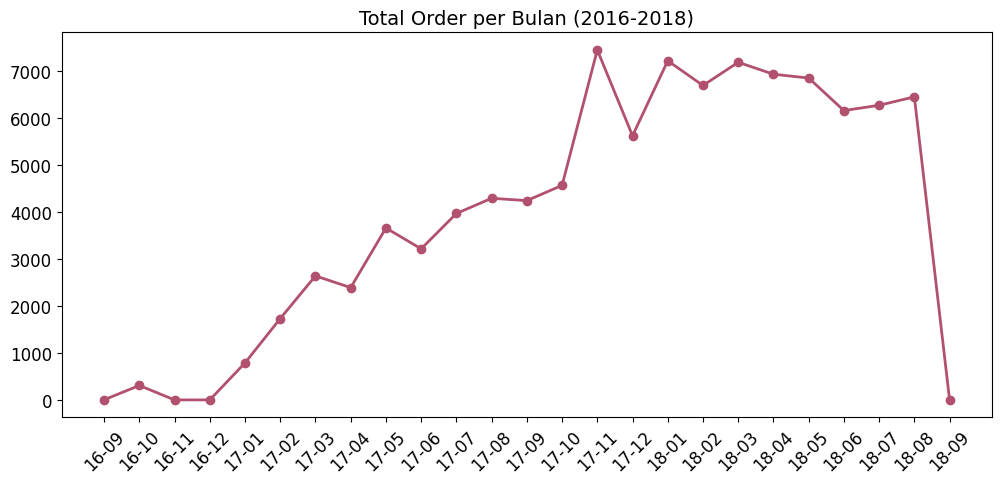

In [77]:
# menampilkan performa penjualan (total order per bulan) menggunakan line chart
monthly_orders_df = order_items_orders_dataset.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#B1516E")
plt.title("Total Order per Bulan (2016-2018)", loc="center", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

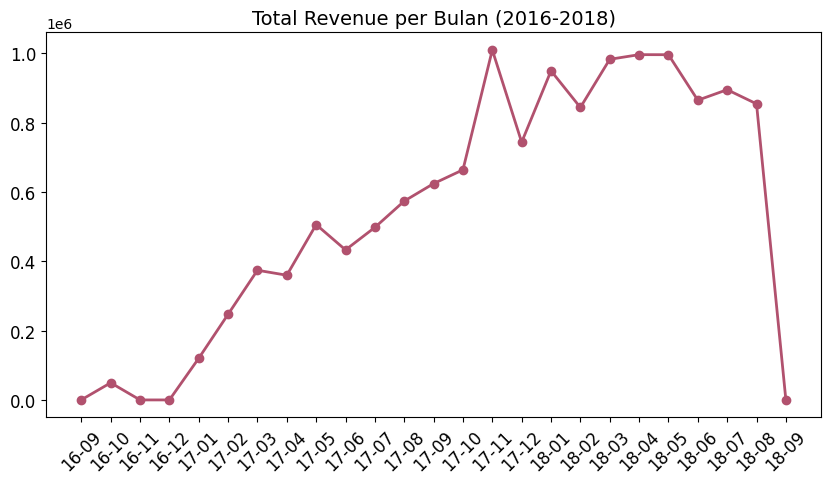

In [78]:
# menampilkan performa penjualan (total revenue per bulan) dengan line chart
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#B1516E"
)

plt.title("Total Revenue per Bulan (2016-2018)", loc="center", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

### Produk apa yang paling banyak dan paling sedikit diminati oleh pembeli?

In [79]:
# menampilkan 5 produk yang paling banyak peminatnya berdasarkan jumlah order yang dilakukan oleh pelanggan
sum_order_items_df = order_items_products_dataset.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head()

,product_category_name,order_item_id
0,cama_mesa_banho,13665
1,moveis_decoracao,11540
2,beleza_saude,11081
3,esporte_lazer,9932
4,informatica_acessorios,9874


In [80]:
# menampilkan 5 produk dengan sedikit peminat berdasarkan jumlah order yang dilakukan oleh pelanggan
sum_order_items_df = order_items_products_dataset.groupby("product_category_name").order_item_id.sum().sort_values(ascending=True).reset_index()
sum_order_items_df.head()

,product_category_name,order_item_id
0,seguros_e_servicos,2
1,fashion_roupa_infanto_juvenil,8
2,pc_gamer,11
3,portateis_cozinha_e_preparadores_de_alimentos,16
4,cds_dvds_musicais,16


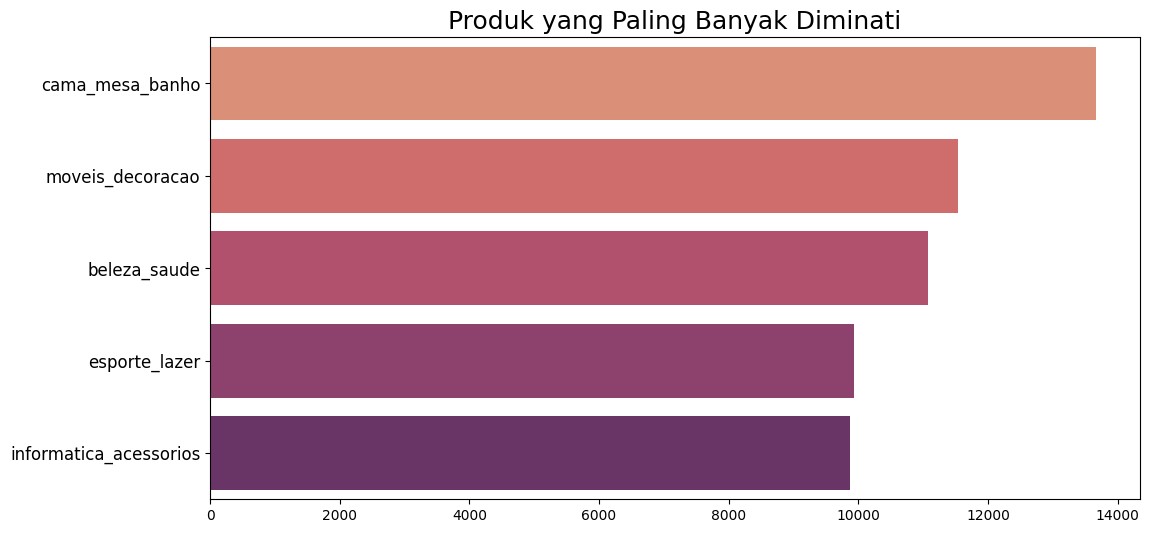

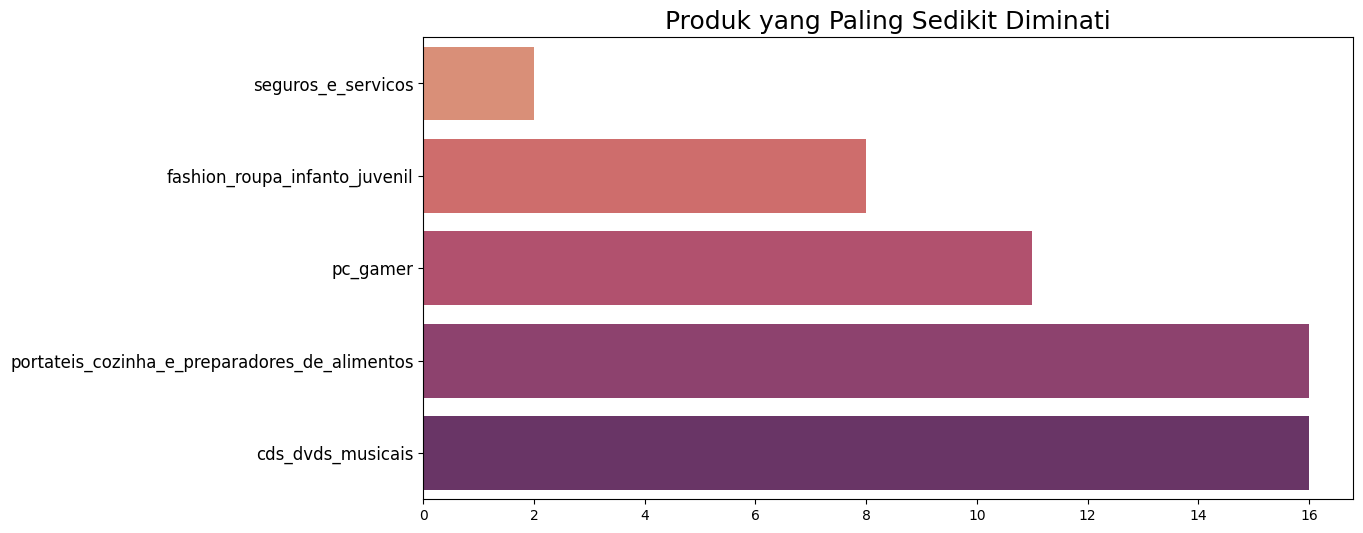

In [81]:
# menampilkan 5 produk dengan banyak peminat dan sedikit peminat dalam bentuk bar plot
fig, ax = plt.subplots(figsize=(12, 6))
colors = "flare"

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Produk yang Paling Banyak Diminati", loc="center", fontsize=18)
ax.tick_params(axis='y', labelsize=12)
plt.show()

# Plot produk yang paling sedikit diminati
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Produk yang Paling Sedikit Diminati", loc="center", fontsize=18)
ax.tick_params(axis='y', labelsize=12)
plt.show()

### Bagaimana demografi pelanggan yang kita miliki?

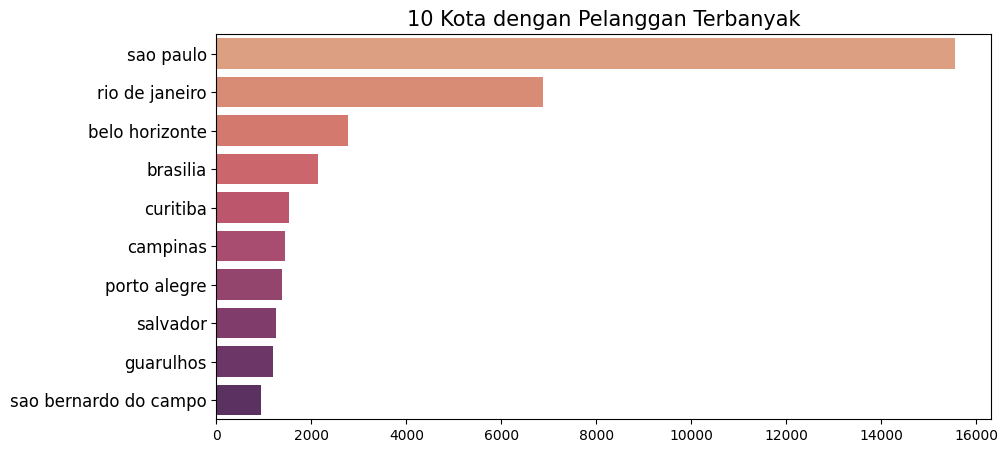

In [82]:
# Menampilkan 10 kota dengan pelanggan terbanyak dalam bentuk bar plot
top10_city_df = orders_customers_dataset.groupby("customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)
top10_city_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
top10_city_df
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=top10_city_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("10 Kota dengan Pelanggan Terbanyak", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

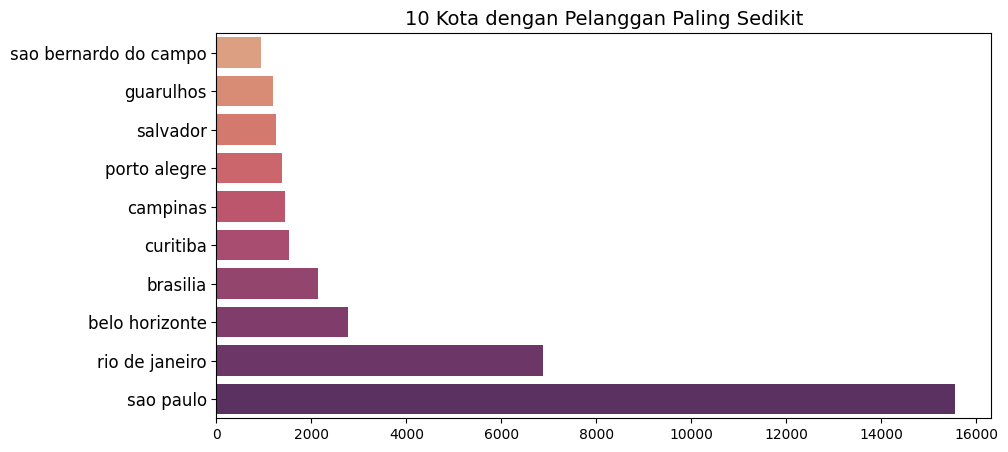

In [83]:
# Menampilkan 10 kota dengan pelanggan paling sedikit dalam bentuk bar plot
top10_city_df = orders_customers_dataset.groupby("customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)
top10_city_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
top10_city_df
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=top10_city_df.sort_values(by="customer_count", ascending=True),
    palette=colors
)
plt.title("10 Kota dengan Pelanggan Paling Sedikit", loc="center", fontsize=14)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

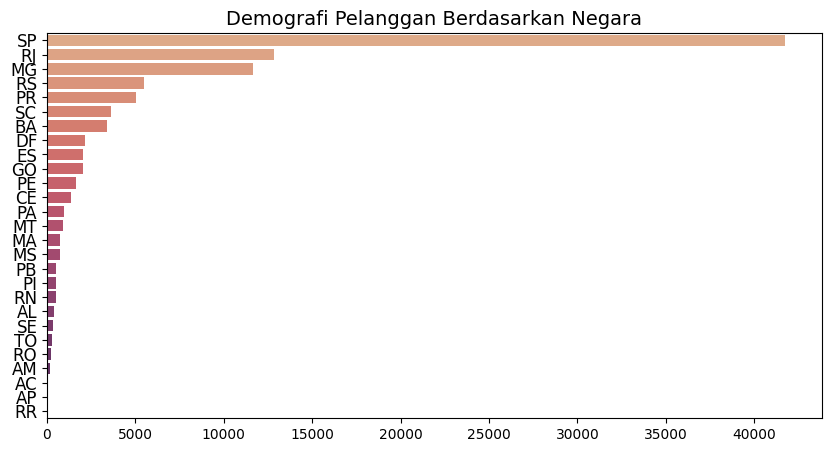

In [84]:
# Menampilkan Demografi Pelanggan Berdasarkan Negara dalam bentuk bar plot
state_df = orders_customers_dataset.groupby("customer_state").customer_id.nunique().sort_values(ascending=False).reset_index()
state_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
state_df
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=state_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Demografi Pelanggan Berdasarkan Negara", loc="center", fontsize=14)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Bagamana demografi penjual yang kita miliki?

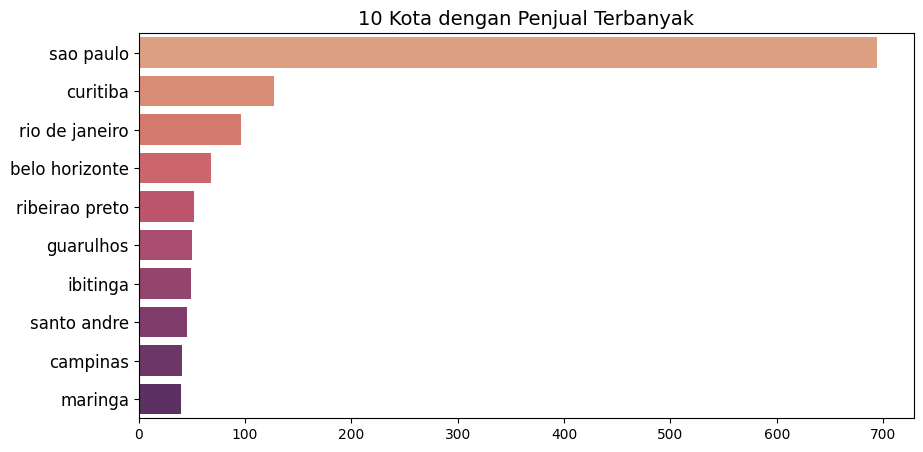

In [85]:
# Menampilkan 10 kota dengan penjual terbanyak dalam bentuk bar plot
seller_df = sellers_dataset.groupby("seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)
seller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
seller_df
plt.figure(figsize=(10, 5))
sns.barplot(
    x="seller_count",
    y="seller_city",
    data=seller_df.sort_values(by="seller_count", ascending=False),
    palette=colors
)
plt.title("10 Kota dengan Penjual Terbanyak", loc="center", fontsize=14)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

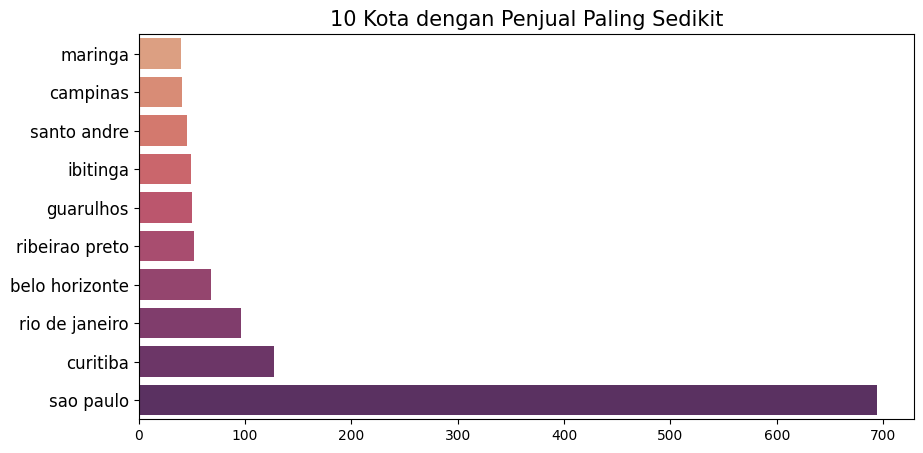

In [86]:
# Menampilkan 10 kota dengan penjual paling sedikit dalam bentuk bar plot
seller_df = sellers_dataset.groupby("seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)
seller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
seller_df
plt.figure(figsize=(10, 5))
sns.barplot(
    x="seller_count",
    y="seller_city",
    data=seller_df.sort_values(by="seller_count", ascending=True),
    palette=colors
)
plt.title("10 Kota dengan Penjual Paling Sedikit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

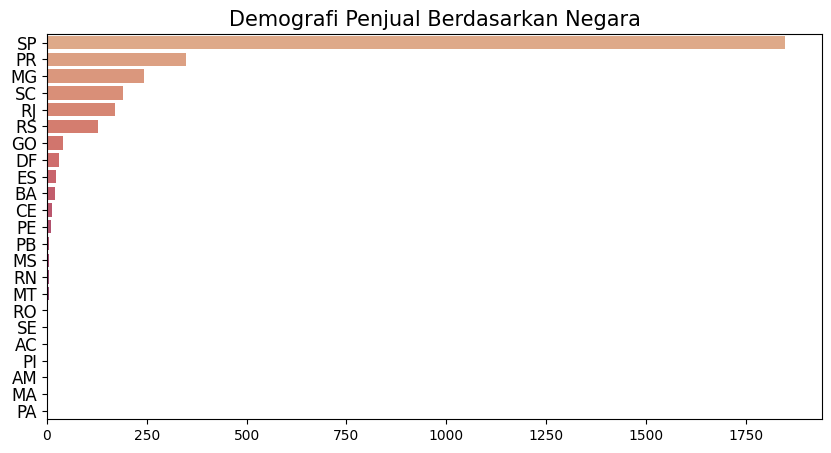

In [87]:
# Menampilkan demografi penjual berdasarkan negara dalam bentuk bar plot
seller_df = sellers_dataset.groupby("seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
seller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
seller_df
plt.figure(figsize=(10, 5))
sns.barplot(
    x="seller_count",
    y="seller_state",
    data=seller_df.sort_values(by="seller_count", ascending=False),
    palette=colors
)
plt.title("Demografi Penjual Berdasarkan Negara", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam 3 tahun terakhir?

a. Berdasarkan Visualization & Explanatory Analysis di atas, maka dapat disimpulkan bahwa pergerakan grafik Order of Month (2016-2018) mempunyai dampak terhadap grafik Total Revenue per Bulan (2016-2018).

b. Jumlah pesanan dan penjualan tertinggi terjadi pada bulan November 2017. Namun, jumlah pesanan mengalami penurunan sejak Maret 2018 dan total pendapatan mengalami penurunan sejak Mei 2018.

c. Diperlukan analisis lebih lanjut untuk mengetahui adanya kegagalan tersebut dan solusi yang tepat untuk mengatasinya.

- Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit diminati?

a. Berdasarkan Visualization & Explanatory Analysis di atas, dapat disimpulkan bahwa 5 produk dengan pesanan terbanyak atau paling banyak diminati oleh pembeli antara lain cama_mesa_banho dengan 13665 order, moveis_decoracao dengan 11540 order, beleza_saude dengan 11081 order, esporte_lazer dengan 9932 order, dan informatica_acessorios dengan 9874 order. Sedangkan untuk 5 produk dengan peminat paling sedikit adalah seguros_e_servicos dengan 2 order, fashion_roupa_infanto_juvenil dengan 8 order, pc_gamer dengan 11 order, portateis_cozinha_e_preparadores_de_alimentos dengan 16 order, dan cds_dvds_musicais dengan 16 order. Sedangkan, 5 produk yang paling sedikit diminati oleh pembeli antara lain seguros_e_servicos sebanyak 2 pesanan, fashion_roupa_infanto_juvenil sebanyak 8 pesanan, pc_gamer sebanyak 11 pesanan, portateis_cozinha_e_preparadores_de_alimentos sebanyak 16 pesanan dan cds_dvds_musicais sebanyak 16 pesanan. 

b. Untuk produk-produk yang kurang peminatnya, diperlukan analisis yang lebih mendalam. Dalam 3 tahun ini, berapa banyak uang yang akan diperoleh dari nomor pesanan ini. Apakah harganya begitu tinggi sehingga penjualan kecil pun bisa menghasilkan keuntungan atau hanya sedikit orang yang tertarik dengan produk tersebut? Selanjutnya, langkah apa yang dilakukan agar stok yang sudah diproduksi dapat habis dan perlu diolah kembali jika produk layak untuk diproduksi.


- Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?

a. Berdasarkan Visualization & Explanatory di atas, maka dapat disimpulkan bahwa 10 pelanggan terbanyak berada di kota Sao Paulo, Rio de Janeiro, Belo Horizonte, Brasilia, Curitiba, Campinas, Porto Alegre, Salvador, Guarulhos, dan Sao Bernardo do Campo. Sedangkan, 10 negara dengan pelanggan terbanyak berada di negara berinisial SP, RJ, MG, RS, PR, SC, BA, DF, ES dan GO. 

b. Diperlukan analisis lebih lanjut mengenai kinerja pasar di wilayah pembelian yang lemah. Hal ini terkait dengan pesaing, jumlah penjual (seller) atau perilaku pelanggan (customer behavior) tertentu.

- Pertanyaan 4: Bagaimana demografi penjual yang kita miliki?

a. Berdasarkan Visualization & Explanatory Analysis di atas, maka dapat disimpulkan bahwa 10 kota dengan jumlah retailer terbanyak terdapat di kota Sao Paulo, Curitiba, Rio de Janeiro, Belo Horizonte, Ribeirao Preto, Guarulhos, Ibitinga, Santo Andre, Campinas, dan Maringa. Saat ini 10 negara dengan jumlah penjual terbanyak adalah SP, PR, MG, SC, RJ, RS, GO, DF, ES, BA. 

b. Diperlukan analisis lebih lanjut mengenai cara meningkatkan penjualan untuk setiap pengecer. Hal ini berlaku untuk promosi, pemilihan produk atau lainnya. Selain itu, diperlukan adanya reward terhadap hasil capaian dari penjualan tertentu agar para penjual antusias dalam melakukan penjualan dan pembelian produknya.

- Diagnostic Analytics: Evaluasi Hasil Penjualan Produk 2016-2018

Keempat pertanyaan di atas menggambarkan beberapa tren kinerja pasar selama tahun 2016-2018. Dalam 3 tahun terakhir, berikut hasil evaluasi hasil penjualan produknya.

a. Penghentian pertama produksi produk dengan total pesanan dan pendapatan rendah selama 2016-2018. Berikutnya, melakukan peningkatan distribusi dan penjualan. Jika dalam 6 bulan berikutnya tidak ada peningkatan, maka produk tersebut dapat dinyatakan dihentikan produksinya.

b. Analisis perilaku pelanggan, pesaing, pilihan kondisi bisnis dan strategi pemasaran yang efektif. Terutama di kota-kota dengan jumlah pelanggan yang sedikit. Buat rencana bisnis baru dan lakukan uji coba selama 1 tahun. Jika tidak ada peningkatan, maka dapat diputuskan untuk tidak membuka toko offline di wilayah tersebut.

c. Maksimalkan campaign pada waktu tertentu (waktu pada umumnya ketika pembeli melakukan order) dan pada suatu event tertentu.

d. Berikan reward untuk seller dengan penjualan ditargetkan.





In [88]:
all_df.to_csv("main_data.csv", index=False)